<a href="https://colab.research.google.com/github/GuptAmit725/DataScience_CaseStudies/blob/master/FPR_TPR_FOR_DIFFRERENT_VECTORIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import nltk


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:

X_tr_bow = np.load('/content/drive/My Drive/AAIC/18_2157_bundle_archive/tr_data_bow.npy')
X_tr_tfidf = np.load('/content/drive/My Drive/AAIC/18_2157_bundle_archive/tr_data_tfidf.npy')
X_tr_tfidf_w2v = np.load('/content/drive/My Drive/AAIC/18_2157_bundle_archive/tr_data_tfidf_w2v.npy')
X_tr_avgw2v = np.load('/content/drive/My Drive/AAIC/18_2157_bundle_archive/tr_data_avgw2v.npy')

X_test_bow = np.load('/content/drive/My Drive/AAIC/18_2157_bundle_archive/test_data_bow.npy')
X_test_tfidf = np.load('/content/drive/My Drive/AAIC/18_2157_bundle_archive/test_data_tfidf.npy')
X_test_tfidf_w2v = np.load('/content/drive/My Drive/AAIC/18_2157_bundle_archive/test_data_tfidf_w2v.npy')
X_test_avgw2v = np.load('/content/drive/My Drive/AAIC/18_2157_bundle_archive/test_data_avgw2v.npy')

X_cv_bow = np.load('/content/drive/My Drive/AAIC/18_2157_bundle_archive/cv_data_bow.npy')
X_cv_tfidf = np.load('/content/drive/My Drive/AAIC/18_2157_bundle_archive/cv_data_tfidf.npy')
X_cv_tfidf_w2v = np.load('/content/drive/My Drive/AAIC/18_2157_bundle_archive/cv_data_tfidf_w2v.npy')
X_cv_avgw2v = np.load('/content/drive/My Drive/AAIC/18_2157_bundle_archive/cv_data_avgw2v.npy')


y_tr_bow = np.load('/content/drive/My Drive/AAIC/18_2157_bundle_archive/y_tr_data.npy')
y_tr_tfidf = np.load('/content/drive/My Drive/AAIC/18_2157_bundle_archive/y_tr_data.npy')
y_tr_tfidf_w2v = np.load('/content/drive/My Drive/AAIC/18_2157_bundle_archive/y_tr_data.npy')
y_tr_avgw2v = np.load('/content/drive/My Drive/AAIC/18_2157_bundle_archive/y_tr_data.npy')

y_test_bow = np.load('/content/drive/My Drive/AAIC/18_2157_bundle_archive/y_test_data.npy')
y_test_tfidf = np.load('/content/drive/My Drive/AAIC/18_2157_bundle_archive/y_test_data.npy')
y_test_tfidf_w2v = np.load('/content/drive/My Drive/AAIC/18_2157_bundle_archive/y_test_data.npy')
y_test_avgw2v = np.load('/content/drive/My Drive/AAIC/18_2157_bundle_archive/y_test_data.npy')

y_cv_bow = np.load('/content/drive/My Drive/AAIC/18_2157_bundle_archive/y_cv_data.npy')
y_cv_tfidf = np.load('/content/drive/My Drive/AAIC/18_2157_bundle_archive/y_cv_data.npy')
y_cv_tfidf_w2v = np.load('/content/drive/My Drive/AAIC/18_2157_bundle_archive/y_cv_data.npy')
y_cv_avgw2v = np.load('/content/drive/My Drive/AAIC/18_2157_bundle_archive/y_cv_data.npy')

In [5]:
accuracy_LR_tr = []
accuracy_LR_test = []

# *1.BOW*

In [6]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_tr_bow)
X_tr=scaler.transform(X_tr_bow)

scaler.fit(X_cv_bow)
X_cv=scaler.transform(X_cv_bow)

scaler.fit(X_test_bow)
X_test=scaler.transform(X_test_bow)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
logistic = LogisticRegression()
distributions = dict(C=np.random.uniform(0,10000,1000),penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(X_cv, y_cv_bow)
c = search.best_params_['C']
p = search.best_params_['penalty']
print('penalty is {0} and C is {1} for {2}.'.format(p,c,'BOW'))

from sklearn.metrics import accuracy_score 
model = LogisticRegression(C = c, penalty=p )
model.fit(X_tr, y_tr_bow)
pred_tr = model.predict(X_tr)
acc_tr = accuracy_score(pred_tr,y_tr_bow)
pred_test_bow = model.predict(X_test)
acc_test = accuracy_score(pred_test_bow, y_test_bow)
print(acc_tr,acc_test)
accuracy_LR_tr.append(acc_tr)
accuracy_LR_test.append(acc_test)

penalty is l2 and C is 3900.029231871518 for BOW.
1.0 0.8959465106560802


TPR is 0.9505988023952096 and FPR is 0.3856041131105398.


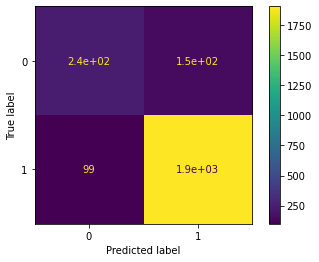

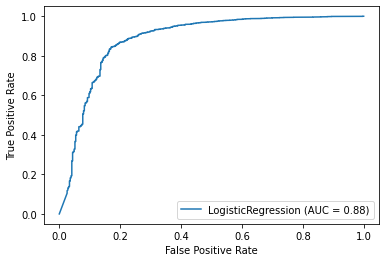

In [7]:
from sklearn.metrics import plot_confusion_matrix as PCM
from sklearn.metrics import plot_roc_curve as ROC
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test_bow, pred_test_bow).ravel()
print('TPR is {0} and FPR is {1}.'.format(tp/(tp+fn),fp/(fp+tn)))
PCM(model,X_test,y_test_bow)
ROC(model,X_test,y_test_bow)
plt.show()

# *2. TFIDF*

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_tr_tfidf)
X_tr=scaler.transform(X_tr_tfidf)

scaler.fit(X_test_tfidf)
X_test=scaler.transform(X_test_tfidf)

scaler.fit(X_cv_tfidf)
X_cv=scaler.transform(X_cv_tfidf)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
logistic = LogisticRegression()
distributions = dict(C=np.random.uniform(0,10000,1000),penalty=['l2'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(X_cv, y_cv_tfidf)
c = search.best_params_['C']
p = search.best_params_['penalty']
print('penalty is {0} and C is {1} for {2}.'.format(p,c,'tfidf'))

from sklearn.metrics import accuracy_score 
model = LogisticRegression(C = c, penalty=p)
model.fit(X_tr, y_tr_bow)
pred_tr = model.predict(X_tr)
acc_tr = accuracy_score(pred_tr,y_tr_bow)
pred_test_tfidf = model.predict(X_test)
acc_test = accuracy_score(pred_test_tfidf, y_test_tfidf)
print(acc_tr,acc_test)

accuracy_LR_tr.append(acc_tr)
accuracy_LR_test.append(acc_test)

penalty is l2 and C is 1986.9532557160253 for tfidf.
1.0 0.8980359381529461


TPR is 0.9585828343313373 and FPR is 0.4138817480719794.


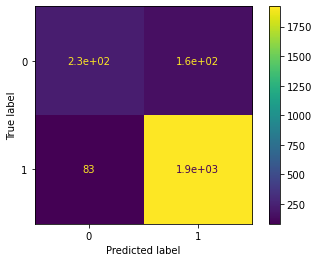

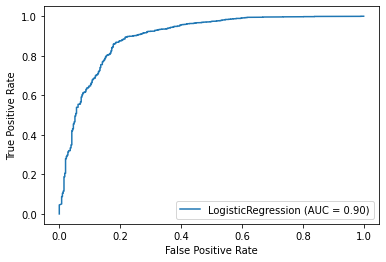

In [9]:
from sklearn.metrics import plot_confusion_matrix as PCM
from sklearn.metrics import plot_roc_curve as ROC
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test_tfidf, pred_test_tfidf).ravel()
print('TPR is {0} and FPR is {1}.'.format(tp/(tp+fn),fp/(fp+tn)))
PCM(model,X_test,y_test_tfidf)
ROC(model,X_test,y_test_tfidf)
plt.show()

# *3. TFIDF-W2V*

In [11]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_tr_tfidf_w2v)
X_tr=scaler.transform(X_tr_tfidf_w2v)

scaler.fit(X_test_tfidf_w2v)
X_test=scaler.transform(X_test_tfidf_w2v)

scaler.fit(X_cv_tfidf_w2v)
X_cv=scaler.transform(X_cv_tfidf_w2v)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
logistic = LogisticRegression()
distributions = dict(C=np.random.uniform(0,10000,1000),penalty=['l2'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(X_cv, y_cv_tfidf_w2v)
c = search.best_params_['C']
p = search.best_params_['penalty']
print('penalty is {0} and C is {1} for {2}.'.format(p,c,'tfidf-w2v'))

from sklearn.metrics import accuracy_score 
model = LogisticRegression(C = c, penalty=p )
model.fit(X_tr, y_tr_tfidf_w2v)
pred_tr = model.predict(X_tr)
acc_tr = accuracy_score(pred_tr,y_tr_tfidf_w2v)
pred_test_tfidf_w2v = model.predict(X_test)
acc_test = accuracy_score(pred_test_tfidf_w2v, y_test_tfidf_w2v)
print(acc_tr,acc_test)

accuracy_LR_tr.append(acc_tr)
accuracy_LR_test.append(acc_test)

penalty is l2 and C is 2076.076329381814 for tfidf-w2v.
0.8729201331114809 0.8692018386961973


TPR is 0.9670658682634731 and FPR is 0.6349614395886889.


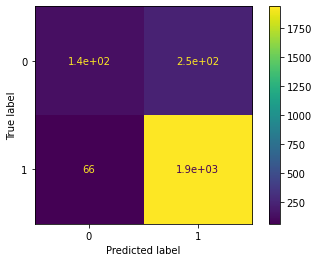

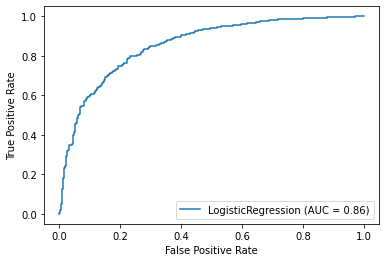

In [12]:
from sklearn.metrics import plot_confusion_matrix as PCM
from sklearn.metrics import plot_roc_curve as ROC
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test_tfidf_w2v, pred_test_tfidf_w2v).ravel()
print('TPR is {0} and FPR is {1}.'.format(tp/(tp+fn),fp/(fp+tn)))
PCM(model,X_test,y_test_tfidf_w2v)
ROC(model,X_test,y_test_tfidf_w2v)
plt.show()

# *4. Avg-W2V*

In [13]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_tr_avgw2v)
X_tr=scaler.transform(X_tr_avgw2v)

scaler.fit(X_test_avgw2v)
X_test=scaler.transform(X_test_avgw2v)

scaler.fit(X_cv_avgw2v)
X_cv=scaler.transform(X_cv_avgw2v)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
logistic = LogisticRegression()
distributions = dict(C=np.random.uniform(0,10000,1000),penalty=['l2'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(X_cv, y_cv_avgw2v)
c = search.best_params_['C']
p = search.best_params_['penalty']
print('penalty is {0} and C is {1} for {2}.'.format(p,c,'Avg-W2V'))

from sklearn.metrics import accuracy_score 
model = LogisticRegression(C = c, penalty=p)
model.fit(X_tr, y_tr_avgw2v)
pred_tr = model.predict(X_tr)
acc_tr = accuracy_score(pred_tr,y_tr_avgw2v)
pred_test_avgw2v = model.predict(X_test)
acc_test = accuracy_score(pred_test_avgw2v, y_test_avgw2v)
print(acc_tr,acc_test)

accuracy_LR_tr.append(acc_tr)
accuracy_LR_test.append(acc_test)

penalty is l2 and C is 9405.070078842624 for Avg-W2V.
0.8560732113144759 0.8549937317175094


TPR is 0.9780439121756487 and FPR is 0.7789203084832905.


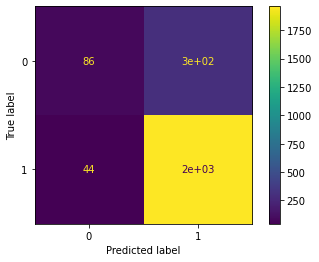

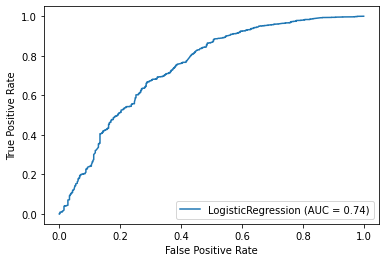

In [14]:
from sklearn.metrics import plot_confusion_matrix as PCM
from sklearn.metrics import plot_roc_curve as ROC
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test_tfidf_w2v, pred_test_avgw2v).ravel()
print('TPR is {0} and FPR is {1}.'.format(tp/(tp+fn),fp/(fp+tn)))
PCM(model,X_test,y_test_avgw2v)
ROC(model,X_test,y_test_avgw2v)
plt.show()

# *2.5. Plotting Train data  accuracy with Test data*

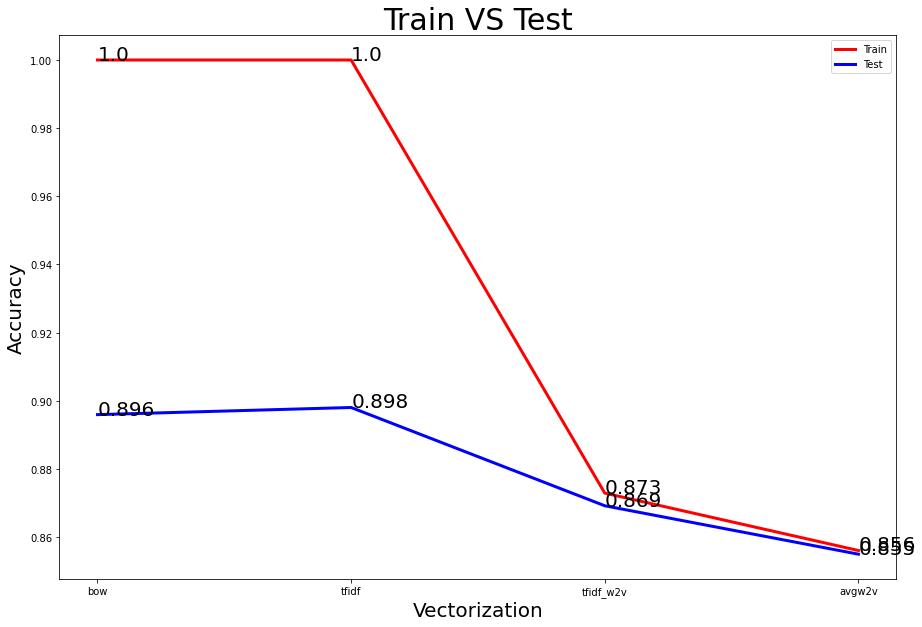

In [15]:
models = ['bow', 'tfidf','tfidf_w2v','avgw2v']

plt.figure(figsize=(15,10))
plt.plot(models,accuracy_LR_tr,color='red',linewidth=3)
plt.plot(models,accuracy_LR_test,color='blue',linewidth=3)
plt.xlabel('Vectorization',size=20)
plt.ylabel('Accuracy',size=20)
plt.title('Train VS Test',size=30)
plt.legend(['Train','Test'])
plt.rcParams['axes.facecolor'] = 'grey'
plt.rcParams['axes.edgecolor'] = '#F4F4CB'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
for i,j in zip(models,accuracy_LR_tr):
 plt.annotate(round(j,3),xy=(i,j), size=20)
for i,j in zip(models,accuracy_LR_test):
 plt.annotate(round(j,3),xy=(i,j), size=20)   
plt.show() 

# *We need high TPR and FPR value for aour model. We can see that for Avg-Word2Vec we have hoghest value for TPR and FPR so this is the apt model to be  used. *